# Problema 2 
## Sebastian Ramirez Escobar 
## Sebastian Carvalho Salazar
## Johan Stiven Paez Bermudez

### Descripción del problema:
1. Descargue un conjunto de datos y elija 4 variables numéricas según su interés. Calcule el vector de medias, la matriz de covarianzas y su inversa.
2. Llame Z a la matriz de datos obtenida al restar la media de cada observación. ¿Cuál es la relación entre Z TZ y la matriz de covarianza? R// $(ZT * Z) / (n - 1)$ Es la matriz de covarianza
3. Calcule la distancia de Mahalanobis de cada observación respecto al vector de medias. Realice una gráfica de dispersión de variables dos a dos coloreando cada observación de acuerdo con la distancia calculada.
4. Identifique la bola de radio 1 con centro en el vector de medias respecto a la distancia de Mahalanobis en la gráfica del punto anterior.


# Desarrollo

Vector de Medias:
glucose           120.894531
bmi                31.992578
blood_pressure     69.105469
age                33.240885
dtype: float64

Matriz de Covarianzas:
                    glucose        bmi  blood_pressure         age
glucose         1022.248314  55.726987       94.430956   99.082805
bmi               55.726987  62.159984       43.004695    3.360330
blood_pressure    94.430956  43.004695      374.647271   54.523453
age               99.082805   3.360330       54.523453  138.303046

Inversa de la Matriz de Covarianzas:
[[ 1.10584097e-03 -9.05130355e-04 -6.65546392e-05 -7.44014710e-04]
 [-9.05130355e-04  1.82358560e-02 -2.01033043e-03  9.97913803e-04]
 [-6.65546392e-05 -2.01033043e-03  3.07933790e-03 -1.11744712e-03]
 [-7.44014710e-04  9.97913803e-04 -1.11744712e-03  8.17981132e-03]]

Z_Transpuesta * Z:
[[784064.45703125  42742.59882813  72428.54296875  75996.51171875]
 [ 42742.59882813  47676.70769531  32984.60117187   2577.37304688]
 [ 72428.54296875  32984.601171

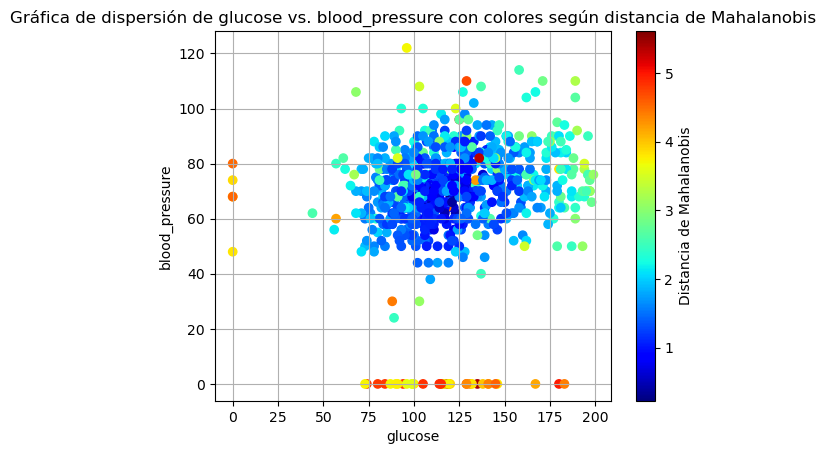

Observaciones dentro de la bola de radio 1:
     pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
17             7      107              74               0        0  29.6   
19             1      115              70              30       96  34.6   
23             9      119              80              35        0  29.0   
25            10      125              70              26      115  31.1   
36            11      138              76               0        0  33.2   
..           ...      ...             ...             ...      ...   ...   
711            5      126              78              27       22  29.6   
714            3      102              74               0        0  29.5   
730            3      130              78              23       79  28.4   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   

     diabetes_pedigree_function  age  outco

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance  # Agrega esta línea para importar scipy.spatial.distance

# Leer el conjunto de datos
path = './content/pima-indians-diabetes.csv'
df = pd.read_csv(path, sep=",",
                  names=[
                      "pregnancies",
                      "glucose",
                      "blood_pressure",
                      "skin_thickness",
                      "insulin",
                      "bmi",
                      "diabetes_pedigree_function",
                      "age",
                      "outcome",
                  ])

# Seleccionar 4 variables numéricas de interés (por ejemplo: glucose, bmi, blood_pressure, age)
selected_columns = ["glucose", "bmi", "blood_pressure", "age"]
selected_data = df[selected_columns]

# Calcular el vector de medias
mean_vector = selected_data.mean()

# Calcular la matriz de covarianzas
covariance_matrix = selected_data.cov()

# Calcular la inversa de la matriz de covarianzas
covariance_inverse = np.linalg.inv(covariance_matrix)

# Calcular Z, la matriz de datos centrados
Z = selected_data - mean_vector

# Calcular Z_Transpuesta * Z
Z_transpose_Z = np.dot(Z.T, Z)

# Imprimir resultados
print("Vector de Medias:")
print(mean_vector)
print("\nMatriz de Covarianzas:")
print(covariance_matrix)
print("\nInversa de la Matriz de Covarianzas:")
print(covariance_inverse)
print("\nZ_Transpuesta * Z:")
print(Z_transpose_Z)
print("\n(Z_Transpuesta * Z) / (n-1):")
print(Z_transpose_Z/(len(selected_data)-1))

# Calcular la distancia de Mahalanobis de cada observación utilizando scipy
mahalanobis_distances = []
for index, row in Z.iterrows():
    mahalanobis_distance = distance.mahalanobis(row, np.zeros(len(selected_columns)), covariance_inverse)  # Cambia mean_vector a np.zeros(len(selected_columns))
    mahalanobis_distances.append(mahalanobis_distance)

# Agregar las distancias a la DataFrame original
df['mahalanobis_distance'] = mahalanobis_distances

# Realizar una gráfica de dispersión de glucose vs. blood_pressure coloreando según la distancia de Mahalanobis
plt.scatter(df['glucose'], df['blood_pressure'], c=df['mahalanobis_distance'], cmap='jet')
plt.xlabel('glucose')
plt.ylabel('blood_pressure')
plt.title('Gráfica de dispersión de glucose vs. blood_pressure con colores según distancia de Mahalanobis')
plt.colorbar(label='Distancia de Mahalanobis')
plt.grid()
plt.show()

# Identificar la bola de radio 1 con centro en el vector de medias respecto a la distancia de Mahalanobis
threshold = 1.0  # Radio de la bola
center = np.zeros(len(selected_columns))  # Cambia center a np.zeros(len(selected_columns))

# Filtrar las observaciones dentro de la bola
in_ball = df[df['mahalanobis_distance'] <= threshold]

print("Observaciones dentro de la bola de radio 1:")
print(in_ball)

In [2]:
autovalores, autovectores = np.linalg.eig(covariance_matrix)

print("valores propios:", autovalores)
print("vectores propios:\n", autovectores)

valores propios: [1051.89444233  371.15984713  120.75614746   53.5481784 ]
vectores propios:
 [[ 0.97997563  0.17276216  0.08240526  0.05486682]
 [ 0.06208185 -0.10511525  0.13663226 -0.98307083]
 [ 0.14987864 -0.96708322  0.15555892  0.13449113]
 [ 0.11545561 -0.15444762 -0.97485508 -0.11168488]]


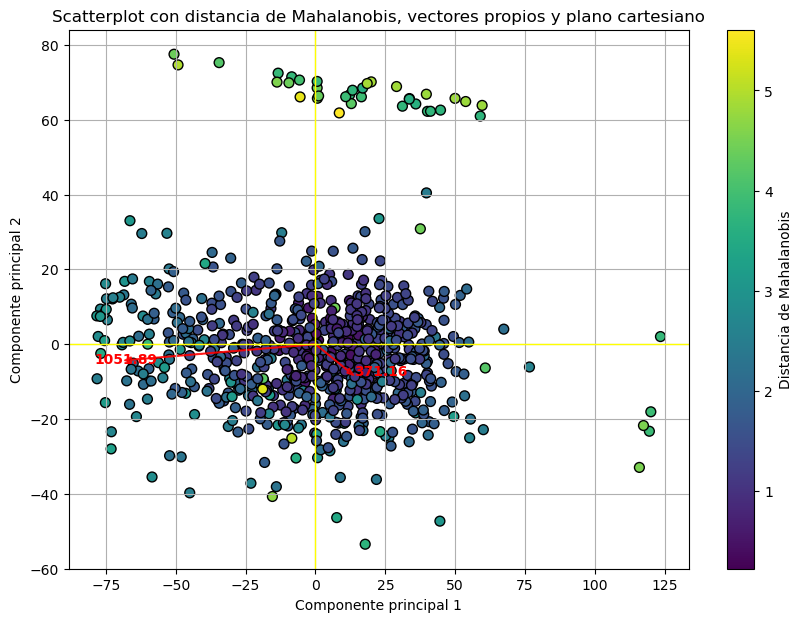

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.decomposition import PCA

# Cargar el conjunto de datos con los nombres de columna proporcionados
path = "./content/pima-indians-diabetes.csv"
df = pd.read_csv(path, sep=",",
                  names=[
                      "pregnancies",
                      "glucose",
                      "blood_pressure",
                      "skin_thickness",
                      "insulin",
                      "bmi",
                      "diabetes_pedigree_function",
                      "age",
                      "outcome",
                  ])

# Seleccionar las columnas especificadas
selected_columns = ["glucose", "bmi", "blood_pressure", "age"]
selected_data = df[selected_columns]

# Calcular la matriz de covarianza
cov_matrix = selected_data.cov()

# Calcular valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Calcular el centroide (media) de los datos seleccionados
centroid = selected_data.mean().values

# Calcular la inversa de la matriz de covarianza
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calcular la distancia de Mahalanobis para cada punto del conjunto de datos
mahalanobis_dist = selected_data.apply(lambda row: distance.mahalanobis(row, centroid, inv_cov_matrix), axis=1)

# Reducción de dimensión a 2 usando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(selected_data)

# Scatterplot con mapa de calor basado en la distancia de Mahalanobis
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=mahalanobis_dist, cmap='viridis', s=50, edgecolors='k')
cbar = plt.colorbar()
cbar.set_label('Distancia de Mahalanobis')

# Superponer vectores propios como flechas
scaling_factor = max(reduced_data[:, 0].max() - reduced_data[:, 0].min(),
                     reduced_data[:, 1].max() - reduced_data[:, 1].min()) / 3
for vector, value in zip(pca.components_, pca.explained_variance_):
    plt.arrow(0, 0, vector[0] * scaling_factor, vector[1] * scaling_factor, 
              head_width=1.5, head_length=2.5, color='red', alpha=0.8, width=0.2)
    plt.text(vector[0]*scaling_factor*1.2, vector[1]*scaling_factor*1.2, f'{value:.2f}', color='red', fontweight='bold')

# Agregar plano cartesiano con origen en (0,0)
plt.axhline(0, color='yellow',linewidth=1)
plt.axvline(0, color='yellow',linewidth=1)

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Scatterplot con distancia de Mahalanobis, vectores propios y plano cartesiano')
plt.grid(True)
plt.show()

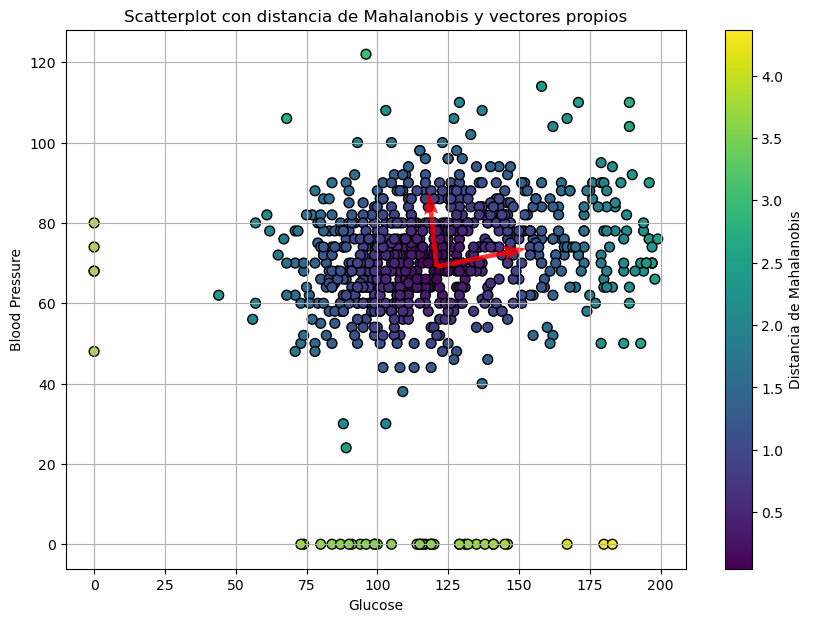

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Leer el conjunto de datos
path = './content/pima-indians-diabetes.csv'
df = pd.read_csv(path, sep=",",
                  names=[
                      "pregnancies",
                      "glucose",
                      "blood_pressure",
                      "skin_thickness",
                      "insulin",
                      "bmi",
                      "diabetes_pedigree_function",
                      "age",
                      "outcome",
                  ])

# Seleccionar las dos variables de interés (por ejemplo, "glucose" y "blood_pressure")
selected_data = df[["glucose", "blood_pressure"]]

# Calcular la matriz de covarianza
cov_matrix = selected_data.cov()

# Calcular valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Calcular el centroide (media) del conjunto de datos
centroid = selected_data.mean().values

# Calcular la inversa de la matriz de covarianza
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calcular la distancia de Mahalanobis para cada punto del conjunto de datos
mahalanobis_dist = selected_data.apply(lambda row: distance.mahalanobis(row, centroid, inv_cov_matrix), axis=1)

# Scatterplot con mapa de calor basado en la distancia de Mahalanobis
plt.figure(figsize=(10, 7))
plt.scatter(selected_data["glucose"], selected_data["blood_pressure"], c=mahalanobis_dist, cmap='viridis', s=50, edgecolors='k')
cbar = plt.colorbar()
cbar.set_label('Distancia de Mahalanobis')

# Graficar vectores propios como líneas desde el centroide
for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    scale_factor = np.sqrt(eigenvalue) 
    plt.quiver(centroid[0], centroid[1], eigenvector[0] * scale_factor, eigenvector[1] * scale_factor, angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8)
    
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Scatterplot con distancia de Mahalanobis y vectores propios')
plt.grid(True)
plt.show()